# Implementation of genetic algorithm to find appropriate features using "GeneticSelectionCV " and inbuilt sklearn library "RFECV"

### First install GeneticSelectionCV library 
pip install sklearn-genetic

In [2]:
!pip install -q sklearn-genetic

     |████████████████████████████████| 153kB 12.5MB/s 


In [3]:
#importing all library here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from numpy import arange,array,ones
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from scipy.interpolate import *
import statistics as st
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import arange,array,ones
from scipy import stats
from scipy.interpolate import *
import statistics as st
from sklearn import svm
from sklearn.svm import SVR
from genetic_selection import GeneticSelectionCV
from sklearn.feature_selection import RFECV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
##import file here
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GaBP2/GeneticAlgorithm/descriptor_ABX2.csv")

#### Defining X (Feature vector) and Y (target vector) here

In [0]:
X_1 = dataset.drop(['BandGap','compound','Ksgap'], axis=1)
X = preprocessing.scale(X_1)

In [0]:
Y = dataset['BandGap']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=50)

#### select an estimator function. e.g. OLS, PLS, Lasso, Ridge etc...

In [0]:
estimator = KernelRidge(kernel='rbf', gamma=0.002, alpha=0.0101)
#estimator = Lasso(alpha=0.00001,max_iter=100000)
#estimator = LinearRegression(fit_intercept=True)
#estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

##### values needed to be optimized, trial and error

In [0]:
model = GeneticSelectionCV(estimator,
                                  cv=20,
                                  verbose=1,
                                  scoring='neg_mean_squared_error',
                                  max_features=None,
                                  n_population=1000,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=100,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-1)

In [12]:
selector = model.fit(X_train, Y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                      	std                    	min                    	max                    
0  	1000  	[-0.19815647 31.913     ]	[0.03635055 4.07546697]	[-0.3269837 19.       ]	[-0.1212405 46.       ]
1  	614   	[-0.17183209 33.435     ]	[0.02660917 3.96633017]	[-0.27150918 23.        ]	[-0.1212405 46.       ]
2  	601   	[-0.15412738 35.108     ]	[0.0187004  3.97169183]	[-0.23892023 22.        ]	[-0.11076245 47.        ]
3  	614   	[-0.14253215 36.891     ]	[0.01501222 3.60348706]	[-0.2280098 25.       ]  	[-0.11076245 48.        ]
4  	597   	[-0.13529513 37.589     ]	[0.01432301 3.49171577]	[-0.21366227 27.        ]	[-0.10964614 47.        ]
5  	616   	[-0.12879299 38.343     ]	[0.01335169 3.47352141]	[-0.2106952 26.       ]  	[-0.10681103 48.        ]
6  	615   	[-0.12303184 39.235     ]	[0.01032882 3.33792975]	[-0.20647536 27.        ]	[-0.10681103 50.        ]
7  	592   	[-0.11902069 39.838     ]	[0.0100944  3.28751517]	[-

In [13]:
selector.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
        True])

##### Features with True values are important 

In [14]:
X_1.columns.values.tolist()

['AM1',
 'AN1',
 'Period1',
 'group1',
 'First_IE1',
 'Second_IE1',
 'elctron_AF1',
 'paulielctrneg1  ',
 'Allen_electneg1',
 'vand_rad1',
 'cov_rad1',
 'atom_rad1',
 'metling1',
 'boiling1',
 'density1',
 'molarVol1',
 'heat_fus1',
 'heat_vap1',
 'thermal_con1',
 'spec_heat1',
 'AM2',
 'AN2',
 'Period2',
 'group2',
 'First_IE21',
 'Second_IE12',
 'elctron_AF2',
 'paulielctrneg2',
 'Allen_electneg2',
 'vand_rad2',
 'cov_rad2',
 'atom_rad2',
 'metling2',
 'boiling2',
 'density2',
 'molarVol2',
 'heat_fus2',
 'heat_vap2',
 'thermal_con2',
 'spec_heat2',
 'AM3',
 'AN3',
 'Period3',
 'group3',
 'First_IE3',
 'Second_IE3',
 'elctron_AF3',
 'paulielctrneg3  ',
 'Allen_electneg3',
 'vand_rad3',
 'cov_rad3',
 'atom_rad3',
 'metling3',
 'boiling3',
 'density3',
 'molarVol3',
 'heat_fus3',
 'heat_vap3',
 'thermal_con3',
 'spec_heat3',
 'ST',
 'KT',
 'CP',
 'Volume']

In [21]:
X_1.columns.values.shape

(64,)

In [22]:
X_1.columns.values

array(['AM1', 'AN1', 'Period1', 'group1', 'First_IE1', 'Second_IE1',
       'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1', 'vand_rad1',
       'cov_rad1', 'atom_rad1', 'metling1', 'boiling1', 'density1',
       'molarVol1', 'heat_fus1', 'heat_vap1', 'thermal_con1',
       'spec_heat1', 'AM2', 'AN2', 'Period2', 'group2', 'First_IE21',
       'Second_IE12', 'elctron_AF2', 'paulielctrneg2', 'Allen_electneg2',
       'vand_rad2', 'cov_rad2', 'atom_rad2', 'metling2', 'boiling2',
       'density2', 'molarVol2', 'heat_fus2', 'heat_vap2', 'thermal_con2',
       'spec_heat2', 'AM3', 'AN3', 'Period3', 'group3', 'First_IE3',
       'Second_IE3', 'elctron_AF3', 'paulielctrneg3  ', 'Allen_electneg3',
       'vand_rad3', 'cov_rad3', 'atom_rad3', 'metling3', 'boiling3',
       'density3', 'molarVol3', 'heat_fus3', 'heat_vap3', 'thermal_con3',
       'spec_heat3', 'ST', 'KT', 'CP', 'Volume'], dtype=object)

In [15]:
print("number of best features", model.n_features_)

number of best features 48


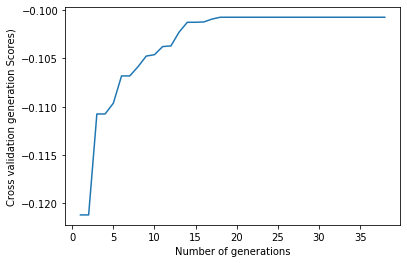

In [16]:
plt.figure()
plt.xlabel("Number of generations")   
plt.ylabel("Cross validation generation Scores)")
plt.plot(range(1,len(model.generation_scores_)+1), model.generation_scores_)
#plt.save_fig("genetic.eps")
plt.show()

### Genetic algorithm with RFECV
#### Important notes: estimator which do not generate feature importance and/or coefficient will not work here. For example KRR can not be used alongwith RFECV library.

In [17]:
estimator = Lasso(alpha=0.00001,max_iter=100000)
model =  RFECV(estimator, step=1, scoring='neg_mean_squared_error')
selector = model.fit(X_train, Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04806108339990178, tolerance: 0.009282671020408164
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048061084949806876, tolerance: 0.009282671020408164
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048060999971896

In [18]:
print(model)
print(selector.support_)
print (X_1.columns.values.tolist())
print("number of best features",model.n_features_)
print(selector.ranking_)

RFECV(cv='warn',
      estimator=Lasso(alpha=1e-05, copy_X=True, fit_intercept=True,
                      max_iter=100000, normalize=False, positive=False,
                      precompute=False, random_state=None, selection='cyclic',
                      tol=0.0001, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)
[ True False False False False  True False False False False  True False
 False False False False False False False False  True False False False
 False False False False  True False  True False False False False False
 False False False False  True False  True False  True  True False  True
 False False False False  True  True  True  True  True  True False False
  True False False  True]
['AM1', 'AN1', 'Period1', 'group1', 'First_IE1', 'Second_IE1', 'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1', 'vand_rad1', 'cov_rad1', 'atom_rad1', 'metling1', 'boiling1', 'density1', 'molarVol1', 'heat_fus1',

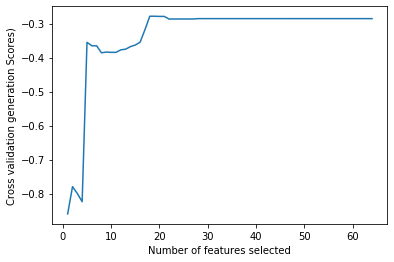

In [19]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation generation Scores)")
plt.plot(range(1,len(model.grid_scores_)+1), model.grid_scores_)
plt.show()